In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [4]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df.drop(columns=["deck"], inplace=True)


/tmp/ipython-input-1446171157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-1446171157.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [5]:
df.duplicated().sum()

np.int64(116)

In [6]:
df = df.drop_duplicates()

In [7]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,775.000000,775.000000,775,775.000000,775.000000,775.000000,775.000000,775,775,775,775,773,775,775
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,483,NaN,NaN,NaN,NaN,562,401,443,443,560,455,437
mean,0.412903,2.246452,NaN,29.581187,0.529032,0.420645,34.878403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.492674,0.853574,NaN,13.766359,0.990326,0.840565,52.408474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,15.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,1.000000,34.197900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.groupby("survived")[["age", "fare"]].mean()

,age,fare
survived,,
0,30.482418,24.022499
1,28.299750,50.314142


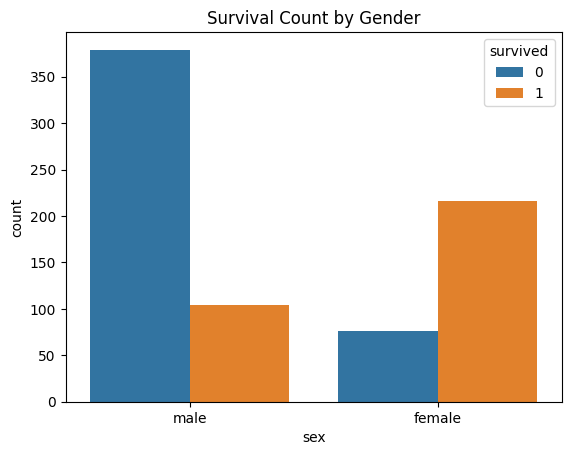

In [9]:
sns.countplot(data=df, x="sex", hue="survived")
plt.title("Survival Count by Gender")
plt.show()

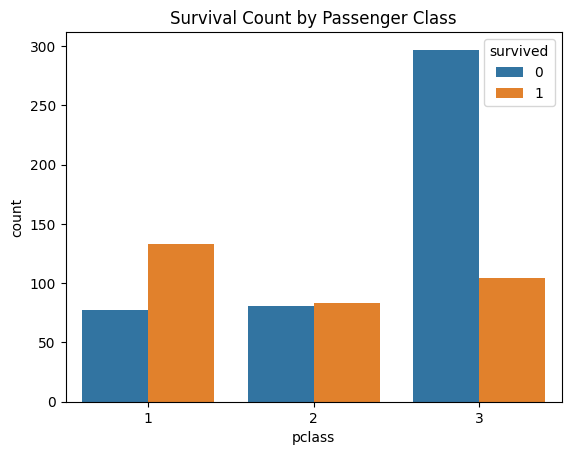

In [10]:
sns.countplot(data=df, x="pclass", hue="survived")
plt.title("Survival Count by Passenger Class")
plt.show()

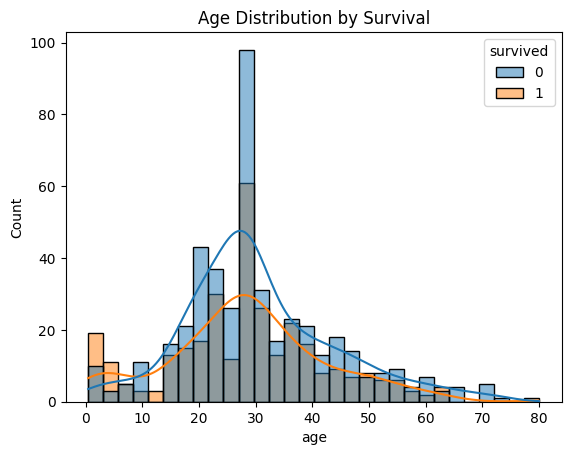

In [11]:
sns.histplot(data=df, x="age", hue="survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

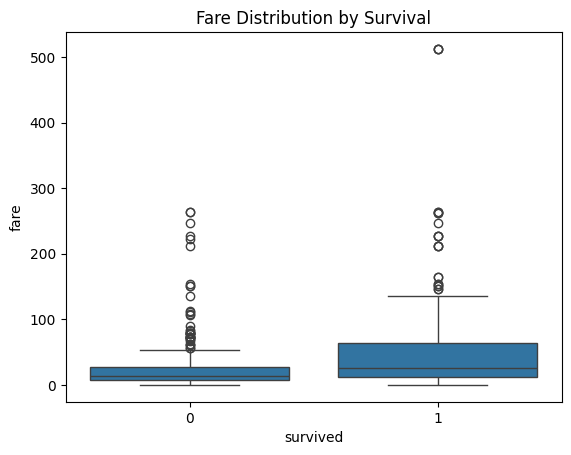

In [12]:
sns.boxplot(data=df, x="survived", y="fare")
plt.title("Fare Distribution by Survival")
plt.show()